In [1]:
import pandas as pd
import numpy as np

In [2]:
station = pd.read_csv('availabilitymodeling.csv')

In [3]:
station

,dock_id,dock_name,formatted_date,year,month,num_day,hour,latitude,longitude,avail_bikes,tot_docks,avail_bikes_proportion,tmp,rain
0,3510,Adam Clayton Powell Blvd & W 123 St,2018-05-01 00:00:00,2018,5,3,0,40.807832,-73.949373,10,31,0.322581,8.9,0
1,3503,Madison Ave & E 120 St,2018-05-01 00:00:00,2018,5,3,0,40.802950,-73.942954,4,30,0.133333,8.9,0
2,3288,E 88 St & 1 Ave,2018-05-01 00:00:00,2018,5,3,0,40.778301,-73.948813,0,39,0.000000,8.9,0
3,3348,Coffey St & Conover St,2018-05-01 00:00:00,2018,5,3,0,40.677236,-74.015665,15,19,0.789474,8.9,0
4,3499,2 Ave & E 122 St,2018-05-01 00:00:00,2018,5,3,0,40.800672,-73.934900,6,25,0.240000,8.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2791199,3048,Putnam Ave & Nostrand Ave,2018-09-07 03:00:00,2018,9,6,3,40.684020,-73.949770,16,19,0.842105,23.3,0
2791200,3467,W Broadway & Spring Street,2018-09-07 03:00:00,2018,9,6,3,40.724947,-74.001659,1,42,0.023810,23.3,0
2791201,3459,E 53 St & 3 Ave,2018-09-07 03:00:00,2018,9,6,3,40.757632,-73.969306,0,34,0.000000,23.3,0
2791202,261,Johnson St & Gold St,2018-09-07 03:00:00,2018,9,6,3,40.694749,-73.983625,22,27,0.814815,23.3,0


In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split

In [5]:
piv = pd.pivot_table(station, values = 'avail_bikes_proportion', index=['dock_id'], columns = 'hour')
X = piv

In [6]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)
 
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k).fit(X)
    kmeans.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeans.inertia_

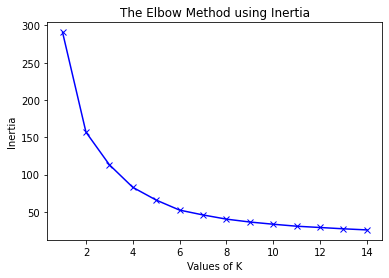

In [7]:
# Using elbow plot to find optimal number of clusters
# the inertia starts decreasing linearly around K = 6

import matplotlib.pyplot as plt
plt.plot(K, inertias, 'bx-') # can use inertias or distortions interchangably
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [8]:
kmeans = KMeans(n_clusters = 6)
clusterlabel = kmeans.fit_predict(X)
piv['label'] = clusterlabel
labels = piv.reset_index()
labels = labels[['dock_id', 'label']]
labels['label'] += 1
labels

hour,dock_id,label
0,83,3
1,119,3
2,120,2
3,143,3
4,144,3
...,...,...
297,3507,6
298,3509,5
299,3510,5
300,3511,5


In [9]:
modeltable = station.merge(labels, how='left', on = 'dock_id')

In [10]:
modeltable
X = modeltable[['year', 
                'month', 
                'num_day', 
                'hour', 
                'latitude', 
                'longitude', 
                'tot_docks', 
                'tmp', 
                'rain', 
                'label']]
y = modeltable['avail_bikes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1)


In [11]:
model = RandomForestRegressor(n_estimators = 300, random_state = 0, verbose = 3)
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 300


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.7s remaining:    0.0s


building tree 2 of 300


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.4s remaining:    0.0s


building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 53.3min finished


RandomForestRegressor(n_estimators=300, random_state=0, verbose=3)

In [12]:
model.score(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  9.6min finished


0.9699524504587652

In [13]:
model.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  4.1min finished


0.8630286823393631